In [24]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from psi_math import epsi, varpsi

sns.set_context('paper')
blue = sns.xkcd_palette(['steel'])[0]

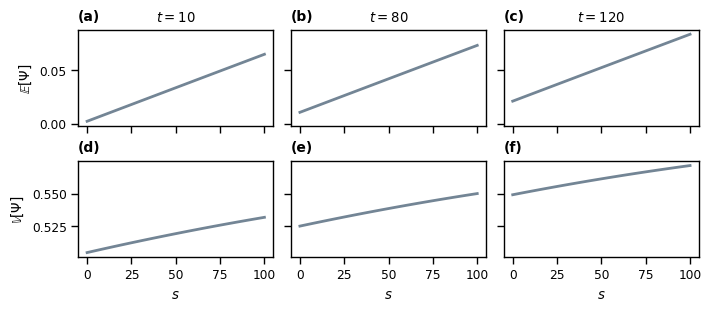

In [22]:
# figure 4
nA = [400]
nB = [600]
ss = np.arange(0, 101, 4)
ts = [5] + list(np.arange(10, 201, 10))
nC = [1000]
# cartesian product (s,t nA, nB, nC)
df_th = pd.DataFrame([{'s': s, 't':t, 'nA': a, 'nB': b, 'nC': c} for s in ss for t in ts for c in nC for a in nA for b in nB])

df_th['mean'] = df_th.apply(lambda x: epsi(x.s, x.t, x.nA, x.nB, x.nC), axis=1)
df_th['var'] = df_th.apply(lambda x: varpsi(x.s, x.t, x.nA, x.nB, x.nC), axis=1)

fig, axs = plt.subplots(2, 3, figsize=(7, 3), constrained_layout=True, sharex='col', sharey='row')

sns.lineplot(data=df_th[df_th.t==10],  x='s', y='mean', color=blue, ax=axs[0,0], linewidth=2)
sns.lineplot(data=df_th[df_th.t==50],  x='s', y='mean', color=blue, ax=axs[0,1], linewidth=2)
sns.lineplot(data=df_th[df_th.t==100], x='s', y='mean', color=blue, ax=axs[0,2], linewidth=2)

sns.lineplot(data=df_th[df_th.t==10],  x='s', y='var', color=blue, ax=axs[1,0], linewidth=2) 
sns.lineplot(data=df_th[df_th.t==50],  x='s', y='var', color=blue, ax=axs[1,1], linewidth=2) 
sns.lineplot(data=df_th[df_th.t==100], x='s', y='var', color=blue, ax=axs[1,2], linewidth=2) 

axs[0,0].set_title('$t=10$')
axs[0,1].set_title('$t=80$')
axs[0,2].set_title('$t=120$')

axs[0,0].set_ylabel('$\\mathbb{E}[\\Psi]$')
axs[1,0].set_ylabel('$\\mathbb{V}[\\Psi]$')

for i in range(3):
    axs[1,i].set_xlabel('$s$')
    axs[1,i].set_xlim(-5,105)
    axs[1,i].set_xticks([0,25,50,75,100])

for i, ax in enumerate(axs.flatten()):
    ax.text(
        0,
        1.1,
        f'({chr(97+i)})',
        transform=ax.transAxes,
        fontsize=10,
        fontweight="bold",
        va="baseline",
        ha="left",
    )

fig.savefig('figures/figure_4.pdf', bbox_inches='tight')

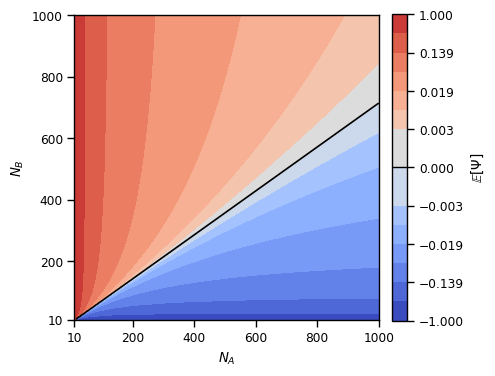

In [26]:
# figure 5

class nonlin_coolwarm(matplotlib.colors.Colormap):
    def __init__(self, nlevels, thresh=0.001):
        self.name = 'nonlin_coolwarm'
        super().__init__(self.name)
        self.cmap = plt.cm.coolwarm
        ls = np.geomspace(thresh, 0.5, num=nlevels)
        self.levels = np.concatenate([0.5-np.flip(ls), [0.5], 0.5+ls])
        self.colors = self.cmap(np.linspace(0, 1, len(self.levels)))
        self.monochrome=False
        

    def __call__(self, x, alpha=None, bytes=False):
        # find which interval x is in (using levels)
        idx = np.digitize(x, self.levels) - 1
        # find the color for each x
        return self.colors[idx]
    
nC = 1000
s = 20 
t = 50

nA = nB = np.arange(10,1001,10)
xs, ys = np.meshgrid(nA, nB)
z = np.zeros((100,100))

for i, j in np.ndindex(xs.shape):
    psi = epsi(s, t, xs[i,j], ys[i,j], nC)
    z[i,j] = psi

nlevels=8
cmap = nonlin_coolwarm(8)
psi_levels = np.geomspace(0.001, 1, num=8)
psi_levels = np.concatenate([-np.flip(psi_levels), [0], psi_levels])

fig, ax = plt.subplots(1, 1, figsize=(5, 4), tight_layout=True)
c = ax.contourf(xs, ys, z, cmap=cmap, levels=psi_levels)
c0 = ax.contour(xs, ys, z, levels=[0], colors='k')  # zero line
# diagonal
#ax.plot(nA, nA, '--', linewidth=1, color='gray')


cbar = plt.colorbar(c, ax=ax, label='$\\mathbb{E}[\\Psi]$', fraction=0.046, pad=0.04)
cbar.ax.axhline(0, color='k', linewidth=1)

ax.set_xlabel('$N_A$')
ax.set_ylabel('$N_B$')
ax.set_xticks([10,200,400,600,800,1000])
ax.set_yticks([10,200,400,600,800,1000])
ax.set_aspect('equal')

fig.savefig('figures/figure_5.pdf', bbox_inches='tight')


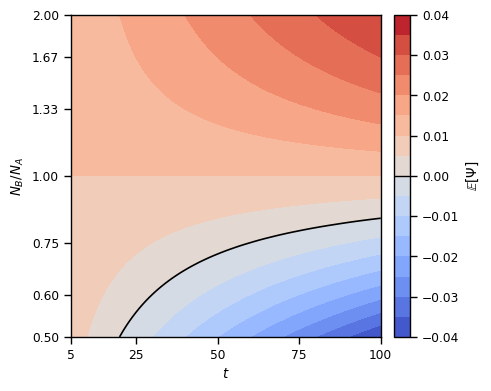

In [28]:
# figure 6

nC = 1000
s = 20
nA=500
t = np.arange(5,101,1)

x = np.linspace(1,2,31)
scales = np.concatenate([np.flip(1/x),x[1:]])

xs, ys = np.meshgrid(t, scales)
z = np.zeros(xs.shape)

for i, j in np.ndindex(xs.shape):
    psi = epsi(s, xs[i,j], nA, ys[i,j]*nA, nC)
    z[i,j] = psi

fig, ax = plt.subplots(1, 1, figsize=(5, 4), tight_layout=True)
c = ax.contourf(xs, ys, z, cmap='coolwarm', levels=np.linspace(-0.04,0.04,17))
c0 = ax.contour(xs, ys, z, levels=[0], colors='k')

cbar = fig.colorbar(c, ax=ax, label='$\\mathbb{E}[\\Psi]$', fraction=0.051, pad=0.04)
cbar.ax.axhline(0, color='k', linewidth=1)

ax.set_xlim(5,100)
ax.set_xlabel('$t$')
ax.set_xticks([5,25,50,75,100])

ax.set_ylabel('$N_B/N_A$')
ax.set_yscale('log')
x = np.linspace(1,2,4)
tickscales = np.concatenate([np.flip(1/x),x[1:]])
ax.set_yticks(tickscales)
ax.set_yticklabels([f'{x:.2f}' for x in tickscales])
# no minor ticks  
ax.set_yticks([], minor=True)

fig.savefig('figures/figure_6.pdf', bbox_inches='tight')